## VOCs

In [ ]:
#tensorflow GPU 사용 확인
from tensorflow.python.client import device_lib
import pandas as pd
import numpy as np
import glob

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16013853678158062829
xla_global_id: -1
]


## 데이터 불러오기 및 정리

### VOCs 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#VOCs 데이터 불러오기
vocs_2019 = pd.read_excel('/content/drive/My Drive/busan_traffic_/voc_2019.xlsx')
vocs_2020 = pd.read_excel('/content/drive/My Drive/busan_traffic_/voc_2020.xlsx')
vocs_2021 = pd.read_excel('/content/drive/My Drive/busan_traffic_/voc_2021.xlsx')

#vocs 데이터 중 사용할 데이터만 선택
vocs_2019 = vocs_2019[['월','일','암모니아\n(ppb)','톨루엔\n(ppb)','mp-자일렌(ppb)', 
                       'o-자일렌(ppb)','자일렌(ppb)','메틸에틸케톤(ppb)','벤젠(ppb)']]
vocs_2020 = vocs_2020[['월','일','암모니아\n(ppb)','톨루엔\n(ppb)','mp-자일렌(ppb)', 
                       'o-자일렌(ppb)','자일렌(ppb)','메틸에틸케톤(ppb)','벤젠(ppb)']]
vocs_2021 = vocs_2021[['월','일','암모니아\n(ppb)','톨루엔\n(ppb)','mp-자일렌(ppb)', 
                       'o-자일렌(ppb)','자일렌(ppb)','메틸에틸케톤(ppb)','벤젠(ppb)']]

In [ ]:
#VOCs 데이터 2019 - 2021까지 합치기
vocs = pd.concat([vocs_2019, vocs_2020])
vocs = pd.concat([vocs, vocs_2021])
vocs.shape

(26304, 9)

In [ ]:
# VOCs 데이터의 오류난 부분 N/A로 변환하기
# 추후 for문으로 바꾸기!

vocs['벤젠(ppb)'] = vocs['벤젠(ppb)'].replace('동불', np.nan)
vocs['벤젠(ppb)'] = vocs['벤젠(ppb)'].replace('점검', np.nan)
vocs['벤젠(ppb)'] = vocs['벤젠(ppb)'].replace('동작불가', np.nan)
vocs['벤젠(ppb)'] = vocs['벤젠(ppb)'].replace('전원단절', np.nan)
vocs['벤젠(ppb)'] = vocs['벤젠(ppb)'].replace('전단', np.nan)
vocs['벤젠(ppb)'] = vocs['벤젠(ppb)'].replace('가중', np.nan)

vocs['암모니아\n(ppb)'] = vocs['암모니아\n(ppb)'].replace('동불', np.nan)
vocs['암모니아\n(ppb)'] = vocs['암모니아\n(ppb)'].replace('점검', np.nan)
vocs['암모니아\n(ppb)'] = vocs['암모니아\n(ppb)'].replace('동작불가', np.nan)
vocs['암모니아\n(ppb)'] = vocs['암모니아\n(ppb)'].replace('전원단절', np.nan)
vocs['암모니아\n(ppb)'] = vocs['암모니아\n(ppb)'].replace('전단', np.nan)
vocs['암모니아\n(ppb)'] = vocs['암모니아\n(ppb)'].replace('가중', np.nan)


vocs['mp-자일렌(ppb)'] = vocs['mp-자일렌(ppb)'].replace('동불', np.nan)
vocs['mp-자일렌(ppb)'] = vocs['mp-자일렌(ppb)'].replace('점검', np.nan)
vocs['mp-자일렌(ppb)'] = vocs['mp-자일렌(ppb)'].replace('동작불가', np.nan)
vocs['mp-자일렌(ppb)'] = vocs['mp-자일렌(ppb)'].replace('전원단절', np.nan)
vocs['mp-자일렌(ppb)'] = vocs['mp-자일렌(ppb)'].replace('전단', np.nan)
vocs['mp-자일렌(ppb)'] = vocs['mp-자일렌(ppb)'].replace('가중', np.nan)
vocs['mp-자일렌(ppb)'] = vocs['mp-자일렌(ppb)'].replace('dks ehl', np.nan)


vocs['o-자일렌(ppb)'] = vocs['o-자일렌(ppb)'].replace('동불', np.nan)
vocs['o-자일렌(ppb)'] = vocs['o-자일렌(ppb)'].replace('점검', np.nan)
vocs['o-자일렌(ppb)'] = vocs['o-자일렌(ppb)'].replace('동작불가', np.nan)
vocs['o-자일렌(ppb)'] = vocs['o-자일렌(ppb)'].replace('전원단절', np.nan)
vocs['o-자일렌(ppb)'] = vocs['o-자일렌(ppb)'].replace('전단', np.nan)
vocs['o-자일렌(ppb)'] = vocs['o-자일렌(ppb)'].replace('가중', np.nan)

vocs['톨루엔\n(ppb)'] = vocs['톨루엔\n(ppb)'].replace('동불', np.nan)
vocs['톨루엔\n(ppb)'] = vocs['톨루엔\n(ppb)'].replace('점검', np.nan)
vocs['톨루엔\n(ppb)'] = vocs['톨루엔\n(ppb)'].replace('동작불가', np.nan)
vocs['톨루엔\n(ppb)'] = vocs['톨루엔\n(ppb)'].replace('전원단절', np.nan)
vocs['톨루엔\n(ppb)'] = vocs['톨루엔\n(ppb)'].replace('전단', np.nan)
vocs['톨루엔\n(ppb)'] = vocs['톨루엔\n(ppb)'].replace('가중', np.nan)

vocs['자일렌(ppb)'] = vocs['자일렌(ppb)'].replace('동불', np.nan)
vocs['자일렌(ppb)'] = vocs['자일렌(ppb)'].replace('점검', np.nan)
vocs['자일렌(ppb)'] = vocs['자일렌(ppb)'].replace('동작불가', np.nan)
vocs['자일렌(ppb)'] = vocs['자일렌(ppb)'].replace('전원단절', np.nan)
vocs['자일렌(ppb)'] = vocs['자일렌(ppb)'].replace('전단', np.nan)
vocs['자일렌(ppb)'] = vocs['자일렌(ppb)'].replace('가중', np.nan)

vocs['메틸에틸케톤(ppb)'] = vocs['메틸에틸케톤(ppb)'].replace('동불', np.nan)
vocs['메틸에틸케톤(ppb)'] = vocs['메틸에틸케톤(ppb)'].replace('점검', np.nan)
vocs['메틸에틸케톤(ppb)'] = vocs['메틸에틸케톤(ppb)'].replace('동작불가', np.nan)
vocs['메틸에틸케톤(ppb)'] = vocs['메틸에틸케톤(ppb)'].replace('전원단절', np.nan)
vocs['메틸에틸케톤(ppb)'] = vocs['메틸에틸케톤(ppb)'].replace('전단', np.nan)
vocs['메틸에틸케톤(ppb)'] = vocs['메틸에틸케톤(ppb)'].replace('가중', np.nan)

print(vocs.isnull().sum())
vocs = vocs.reset_index()

월                 0
일                 0
암모니아\n(ppb)    1107
톨루엔\n(ppb)     1334
mp-자일렌(ppb)    1333
o-자일렌(ppb)     1333
자일렌(ppb)       1332
메틸에틸케톤(ppb)    1332
벤젠(ppb)        2155
dtype: int64


### 기상 & 대기질 데이터

In [ ]:
# ASOS DATA (Busan) 기상데이터

all_data = pd.DataFrame()
for f in glob.glob('/content/drive/My Drive/busan_traffic_/OBS_BUSAN_*.xlsx'):
    df = pd.read_excel(f)
    all_data = all_data.append(df, ignore_index=True)

all_data.head()

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m)
0,152,울산,2016-01-01 00:00:00,1.7,NaN,1.4,320.0,62.0,4.3,-4.8,1028.0,1032.4,NaN,NaN,0.0,0.0,NaN,1100.0
1,152,울산,2016-01-01 01:00:00,0.4,NaN,1.4,290.0,69.0,4.3,-4.6,1027.7,1032.1,NaN,NaN,NaN,NaN,NaN,900.0
2,152,울산,2016-01-01 02:00:00,-0.1,NaN,1.1,270.0,71.0,4.3,-4.7,1027.6,1032.0,NaN,NaN,NaN,NaN,NaN,900.0
3,152,울산,2016-01-01 03:00:00,0.0,NaN,1.4,320.0,69.0,4.2,-5.0,1027.5,1031.9,NaN,NaN,0.0,0.0,NaN,900.0
4,152,울산,2016-01-01 04:00:00,-0.7,NaN,1.3,290.0,74.0,4.3,-4.7,1027.5,1031.9,NaN,NaN,0.0,0.0,NaN,900.0


In [ ]:
# AIR DATA (BUSAN 2016-2020) 대기질 데이터
air = pd.read_excel('/content/drive/My Drive/busan_traffic_/air_data_traffic.xlsx', index_col=0)
air_2021 = pd.read_excel('/content/drive/My Drive/busan_traffic_/air_2021_df.xlsx', index_col = 0)
print(air.columns)
print(air_2021.columns)
print(air.shape)
print(air_2021.shape)

Index(['측정일시', 'SO2', 'O3', 'NO2', 'PM25'], dtype='object')
Index(['date', 'PM25', 'O3', 'NO2', 'SO2'], dtype='object')
(17544, 5)
(8760, 5)


In [ ]:
# 2021 데이터에 맞추어 columns 수정하기
air.columns = ['date','SO2','O3','NO2','PM25']
air = air[['date','PM25','O3','NO2','SO2']]

# 2016-2021까지 데이터 합치기
air_data = pd.concat([air, air_2021])
air_data = air_data.reset_index()
air_data = air_data.drop('index', axis=1)
air_data.head(3)

,date,PM25,O3,NO2,SO2
0,2019010101,23.0,0.010,0.025,0.003
1,2019010102,21.0,0.012,0.021,0.003
2,2019010103,19.0,0.012,0.021,0.003


In [ ]:
air_data

,date,PM25,O3,NO2,SO2
0,2019010101,23.0,0.010,0.025,0.003
1,2019010102,21.0,0.012,0.021,0.003
2,2019010103,19.0,0.012,0.021,0.003
3,2019010104,24.0,0.011,0.021,0.003
4,2019010105,28.0,0.013,0.022,0.003
...,...,...,...,...,...
26299,2021-12-31:20,NaN,0.026,0.013,0.002
26300,2021-12-31:21,NaN,0.030,0.011,0.001
26301,2021-12-31:22,NaN,0.029,0.011,0.001
26302,2021-12-31:23,NaN,0.032,0.009,0.001


In [ ]:
#DNN에 이용할 다음날 PM2.5데이터 입력
tomm_pm = air_data['PM25'][24:]
tomm_pm = tomm_pm.reset_index()
air_data['tomm_pm'] = tomm_pm['PM25']
print(air_data.PM25.mean())
air_data.head(3)

17.14428113517317


,date,PM25,O3,NO2,SO2,tomm_pm
0,2019010101,23.0,0.010,0.025,0.003,22.0
1,2019010102,21.0,0.012,0.021,0.003,27.0
2,2019010103,19.0,0.012,0.021,0.003,21.0


## Preprocessing

###### ASOS DATA

In [ ]:
# 기상데이터 날짜.시간에 맞춰 정렬
asos_data = all_data.sort_values(by='일시')
# 기상데이터 중 사용할 지점 선정
asos_data = asos_data[asos_data['지점명'] == '부산']
# 사용하지 않는 데이터 Drop
asos_data = asos_data.drop(['지점','지점명','최저운고(100m )','해면기압(hPa)','일조(hr)','일사(MJ/m2)','중하층운량(10분위)','시정(10m)'], axis=1)
# 강수량과 전운량의 n/a 값은 값이 0이기 때문에 0으로 결측치 채우기
asos_data['강수량(mm)'] = asos_data['강수량(mm)'].fillna(0)
asos_data['전운량(10분위)'] = asos_data['전운량(10분위)'].fillna(0)
asos_data.columns = ['date','tem','rain','ws','wd','hum','vapor','dew','press','cloud']

In [ ]:
df = asos_data.copy()

In [ ]:
df = df.reset_index()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,52608.0,55532.839416,28035.721346,8784.0,30695.75,56987.5,83303.25,96455.0
tem,52603.0,15.463428,8.515816,-12.2,9.00,16.2,22.20,36.6
rain,52608.0,0.195138,1.614325,0.0,0.00,0.0,0.00,78.8
ws,52571.0,3.133952,1.764552,0.0,1.90,2.9,4.00,18.5
wd,52571.0,178.448194,111.667783,0.0,70.00,200.0,270.00,360.0
hum,52608.0,63.466906,20.673821,7.0,48.00,65.0,80.00,100.0
vapor,52604.0,13.500152,8.824702,0.6,6.00,11.6,20.50,36.3
dew,52602.0,7.868762,11.714246,-29.0,-0.20,9.1,17.90,27.3
press,52600.0,1007.472785,7.395738,952.2,1001.90,1007.6,1013.20,1027.1
cloud,52608.0,4.454798,4.103320,0.0,0.00,4.0,9.00,10.0


In [ ]:
ws = df['ws'].dropna(how='all')
wd = df['wd'].dropna(how='all')

Text(0, 0.5, 'Wind Velocity [m/s]')

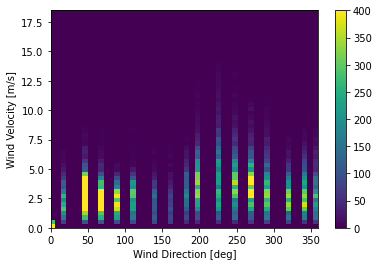

In [ ]:
import matplotlib.pyplot as plt

plt.hist2d(wd, ws, bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [ ]:
# wind_speed / wind_direction convert to vector
wv = asos_data.pop('ws')
wd_rad = asos_data.pop('wd')*np.pi / 180

asos_data['wind_x'] = wv*np.cos(wd_rad)
asos_data['wind_y'] = wv*np.sin(wd_rad)

#나머지 결측치 linear 방법으로 채우기
asos_data = asos_data.interpolate(method = 'ffill')
asos_data = asos_data[26304:]
asos_data = asos_data.reset_index()
asos_data.head(3)

,index,date,tem,rain,hum,vapor,dew,press,cloud,wind_x,wind_y
0,61368,2019-01-01 00:00:00,2.1,0.0,25.0,1.8,-15.9,1022.5,3.0,1.778505,-4.886402
1,61369,2019-01-01 01:00:00,1.0,0.0,25.0,1.6,-16.8,1022.8,0.0,1.641697,-4.510525
2,61370,2019-01-01 02:00:00,-0.1,0.0,26.0,1.6,-17.3,1022.3,0.0,3.753618,-3.149659


(-15.50492824296749, 10.524557352802173, -13.437604477238487, 15.6)

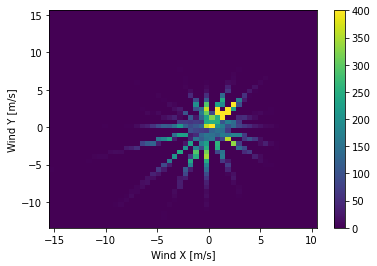

In [ ]:
plt.hist2d(asos_data['wind_x'], asos_data['wind_y'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

###### 전체 데이터 병합

In [ ]:
#대기질 데이터와 VOCs 데이터 합치기 위해 column명 변경
vocs.columns = ['index','month','date','ammonia','toluen','mp-xylen','o-xylen','xylen','methyle','benzene']

In [ ]:
air_data['date']    = asos_data['date']
air_data['tem']     = asos_data['tem']
air_data['rain']    = asos_data['rain']
air_data['wind_x']  = asos_data['wind_x']
air_data['wind_y']  = asos_data['wind_y']
air_data['hum']     = asos_data['hum']
air_data['press']   = asos_data['press']
air_data['cloud']   = asos_data['cloud']
air_data['ammonia'] = vocs['ammonia']
air_data['toluen']  = vocs['toluen']
air_data['methyle'] = vocs['methyle']

print(np.std(air_data['PM25']))
air_data = air_data.set_index('date')
air_data.head(3)

12.685179754693436


,PM25,O3,NO2,SO2,tomm_pm,tem,rain,wind_x,wind_y,hum,press,cloud,ammonia,toluen,methyle
date,,,,,,,,,,,,,,,
2019-01-01 00:00:00,23.0,0.010,0.025,0.003,22.0,2.1,0.0,1.778505,-4.886402,25.0,1022.5,3.0,76.1,2.8,0.0
2019-01-01 01:00:00,21.0,0.012,0.021,0.003,27.0,1.0,0.0,1.641697,-4.510525,25.0,1022.8,0.0,72.5,2.6,0.0
2019-01-01 02:00:00,19.0,0.012,0.021,0.003,21.0,-0.1,0.0,3.753618,-3.149659,26.0,1022.3,0.0,70.1,2.5,0.0


In [ ]:
air_data.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=26304, freq=None)

In [ ]:
new_data = air_data.copy()
new_data = new_data.reset_index()
new_data = new_data[['date','NO2', 'O3']]
new_data.head()

,date,NO2,O3
0,2019-01-01 00:00:00,0.025,0.010
1,2019-01-01 01:00:00,0.021,0.012
2,2019-01-01 02:00:00,0.021,0.012
3,2019-01-01 03:00:00,0.021,0.011
4,2019-01-01 04:00:00,0.022,0.013


In [ ]:
new_data['month_date'] = new_data['date'].astype(str).str[5:7]
new_data.head()

,date,NO2,O3,month_date
0,2019-01-01 00:00:00,0.025,0.010,01
1,2019-01-01 01:00:00,0.021,0.012,01
2,2019-01-01 02:00:00,0.021,0.012,01
3,2019-01-01 03:00:00,0.021,0.011,01
4,2019-01-01 04:00:00,0.022,0.013,01


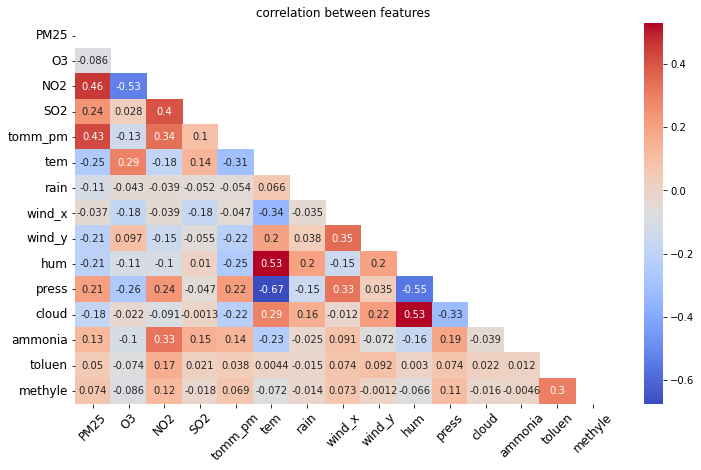

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

heat_map = air_data.corr()
mask = np.zeros_like(heat_map)
mask[np.triu_indices_from(mask)] =True
heatmap_ax = sns.heatmap(heat_map, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=12, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=12)
plt.title('correlation between features')
plt.show()

In [ ]:
air_data_a = air_data.corr()[4:5]
air_data_a = air_data_a.transpose()

In [ ]:
air_data_a = air_data_a.sort_values(by='tomm_pm', ascending=False)
air_data_a = air_data_a.transpose()

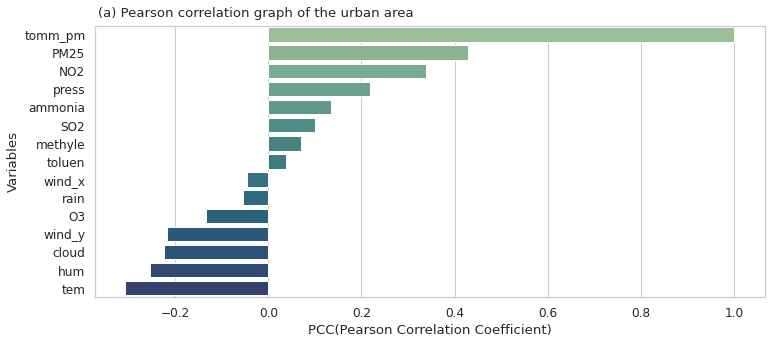

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
plt.xlabel('PCC(Pearson Correlation Coefficient)')
plt.ylabel('Variables')
plt.title('(a) Pearson correlation graph of the urban area',
          position = (0.24, 1.01))
sns.barplot(data = air_data_a, orient='h', palette = 'crest')

###### DATA

In [ ]:
# Train, Vlidation, test set
air_data = air_data.reset_index()
air_train = air_data[air_data['date'].astype(str).str[:4] == '2019']
air_valid = air_data[air_data['date'].astype(str).str[:4] == '2020']
air_test = air_data[air_data['date'].astype(str).str[:4] == '2021']

air_train.columns = ['date', 'PM25', 'O3', 'NO2', 'SO2', 'tomm_pm', 'tem', 'rain', 'wind_x',
       'wind_y', 'hum', 'press', 'cloud', 'ammonia', 'toluen', 'methyle']
air_valid.columns = ['date', 'PM25', 'O3', 'NO2', 'SO2', 'tomm_pm', 'tem', 'rain', 'wind_x',
       'wind_y', 'hum', 'press', 'cloud', 'ammonia', 'toluen', 'methyle']
air_test.columns = ['date', 'PM25', 'O3', 'NO2', 'SO2', 'tomm_pm', 'tem', 'rain', 'wind_x',
       'wind_y', 'hum', 'press', 'cloud', 'ammonia', 'toluen', 'methyle']

print(air_train.shape, air_valid.shape, air_test.shape)
air_train.isnull().sum()

(8760, 16) (8784, 16) (8760, 16)


date         0
PM25       298
O3         352
NO2        380
SO2        354
tomm_pm    298
tem          0
rain         0
wind_x       0
wind_y       0
hum          0
press        0
cloud        0
ammonia    175
toluen     603
methyle    603
dtype: int64

In [ ]:
#outlier 구하는 식
# 1) 신뢰구간 이용
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
# 2) IQR (25% 에서 75% 사이의 값 이용하기)
def get_outlier(df=None, column=None, weight = 1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

# !!!! outlier 구할 때 해당 column에 빈 값이 있으면 결과가 나오지 않음 dropna 이후에 진행하기.

In [ ]:
#결측치 제거
air_train = air_train.dropna(how='any')
air_valid = air_valid.dropna(how='any')
air_test = air_test.dropna(how='any')

air_train = air_train.reset_index()
air_valid = air_valid.reset_index()
air_test = air_test.reset_index()

air_train = air_train.drop('index', axis=1)
air_valid = air_valid.drop('index', axis=1)
air_test = air_test.drop('index', axis=1)

In [ ]:
#def get_outlier(df=None, column=None, weight = 1.5):
outlier_IQR = get_outlier(df = air_test, column='PM25', weight=1.5)
len(outlier_IQR)

air_test = air_test.drop(outlier_IQR)
air_test = air_test.reset_index()
air_test = air_test.drop('index', axis=1)

In [ ]:
air_test.columns

Index(['date', 'PM25', 'O3', 'NO2', 'SO2', 'tomm_pm', 'tem', 'rain', 'wind_x',
       'wind_y', 'hum', 'press', 'cloud', 'ammonia', 'toluen', 'methyle'],
      dtype='object')

In [ ]:
x_train = air_train[['PM25', 'O3', 'NO2', 'SO2', 'tomm_pm', 'tem', 'rain', 'wind_x', 'wind_y',
       'hum', 'press', 'cloud', 'ammonia', 'toluen', 'methyle']]
y_25_train = air_train[['PM25']]

x_valid = air_valid[['PM25', 'O3', 'NO2', 'SO2', 'tomm_pm', 'tem', 'rain', 'wind_x', 'wind_y',
       'hum', 'press', 'cloud', 'ammonia', 'toluen', 'methyle']]
y_25_valid = air_valid[['PM25']]

x_test = air_test[['PM25', 'O3', 'NO2', 'SO2', 'tomm_pm', 'tem', 'rain', 'wind_x', 'wind_y',
       'hum', 'press', 'cloud', 'ammonia', 'toluen', 'methyle']]
y_25_test = air_test[['PM25']]

In [ ]:
#StandardScaler & MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaler.fit(x_train)

train_scaled = pd.DataFrame(scaler.transform(x_train))
valid_scaled = pd.DataFrame(scaler.transform(x_valid))
test_scaled = pd.DataFrame(scaler.transform(x_test))

train_scaled['predict_pm25'] = y_25_train['PM25']
valid_scaled['predict_pm25'] = y_25_valid['PM25']
test_scaled['predict_pm25'] = y_25_test['PM25']

In [ ]:
test_scaled.shape, air_test.shape